<a href="https://colab.research.google.com/github/KEMAL-MUDIE/KEMAL-MUDIE/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing techniques for Computer Vision

### Installing Open CV

In [38]:
!pip install opencv-python

### Library Imports

In [39]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.patches as patches
from pathlib import Path

## 1. Reading an Image

Open-CV reads image in the BGR (Blue, Green, Red) order, so we change the order of channels to RGB

In [40]:
path="/home/kamal/Downloads/RBCDSAI/photo_6060108119633146336_y.jpg"
def read_image(path):
    im = cv2.imread(str(path))
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

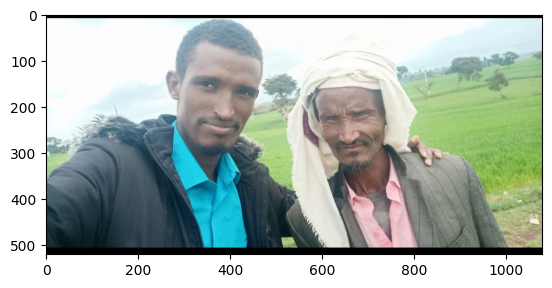

In [41]:
im = read_image('/content/photo_6060108119633146336_y.jpg')
plt.imshow(im)

In [42]:
im.shape

(521, 1080, 3)

## 2. Cropping an image

#### Center Crop

In [43]:
def center_crop(im, crop_pixels = 50):
    return im[crop_pixels:im.shape[0] - crop_pixels, crop_pixels:im.shape[1] - crop_pixels]

(-0.5, 979.5, 420.5, -0.5)

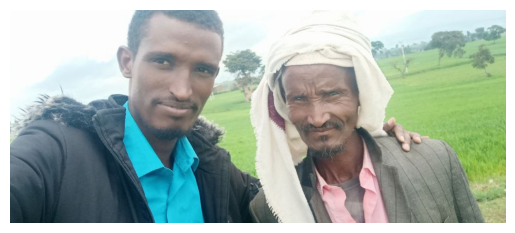

In [44]:
cropped = center_crop(im)
plt.imshow(cropped)
plt.axis('off')

#### Random Crop

In [45]:
def random_crop(im, row_crop_pix = 20):
    rows, cols, _ = im.shape
    cols_crop_pix = round(row_crop_pix*cols/rows)
    row_crop_pix = int(np.floor(2*random.uniform(0, 1)*row_crop_pix))
    cols_crop_pix = int(np.floor(2*random.uniform(0, 1)*cols_crop_pix).astype(int))
    return im[row_crop_pix:rows - row_crop_pix, cols_crop_pix:cols - cols_crop_pix]

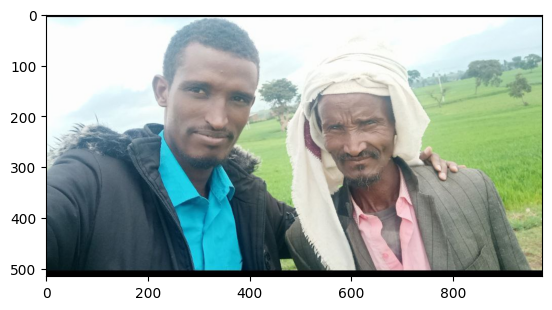

In [46]:
cropped = random_crop(im)
plt.imshow(cropped)

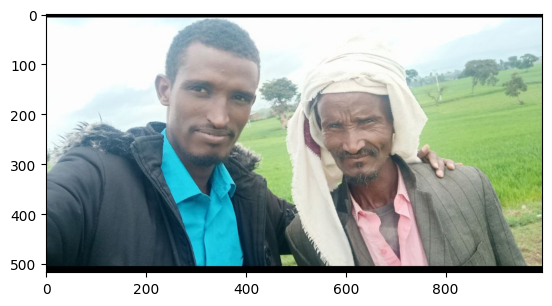

In [47]:
cropped = random_crop(im)
plt.imshow(cropped)

## 3. Resizing

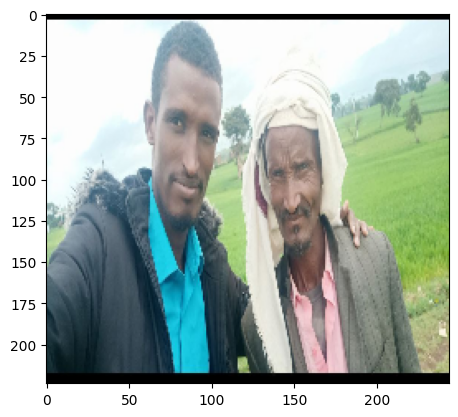

In [48]:
resized = cv2.resize(im, (244,224))
plt.imshow(resized)

## 4. Flip image

#### Vertical flip

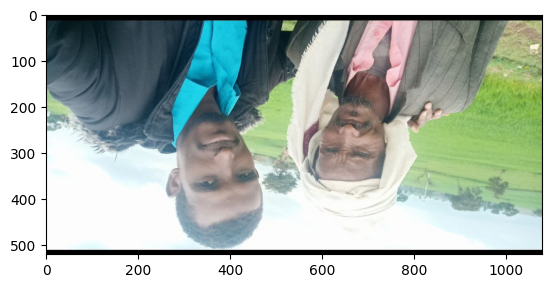

In [49]:
flip_v = np.flip(im,0)
plt.imshow(flip_v)

#### Horizontal flip

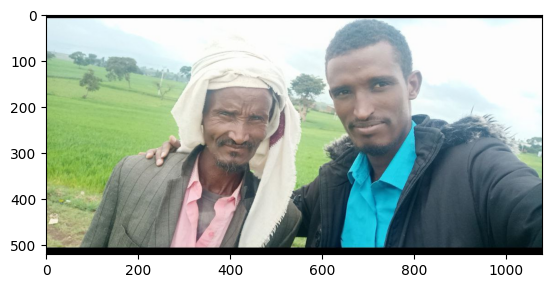

In [50]:
flip_h = np.flip(im,1)
plt.imshow(flip_h)

## 5. Rotate image

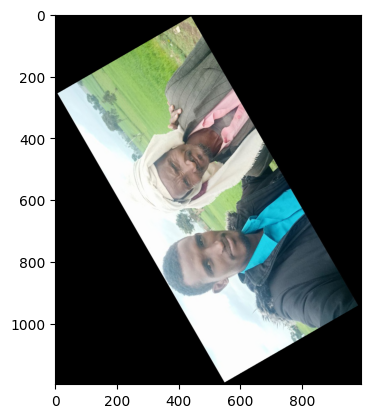

In [51]:
from scipy import ndimage
rotated = ndimage.rotate(im, 120)
plt.imshow(rotated)

#### Affine transformation with border filling

In [52]:
def affine_img(img, angle):
    rows, columns, _ = img.shape
    M = cv2.getRotationMatrix2D((rows/2,columns/2),angle,1) #Calculates an affine matrix of 2D rotation.
    return cv2.warpAffine(img,M,(columns,rows), borderMode=cv2.BORDER_REFLECT,
                          flags=cv2.INTER_NEAREST)

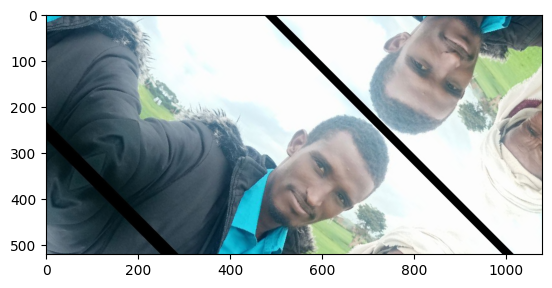

In [53]:
rotated = affine_img(im, -45)
plt.imshow(rotated)

## 6. Change Brightness and Contrast

In [54]:
def bright_contrast_loop (image, alpha=1, beta=0):
    new_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
    return new_image

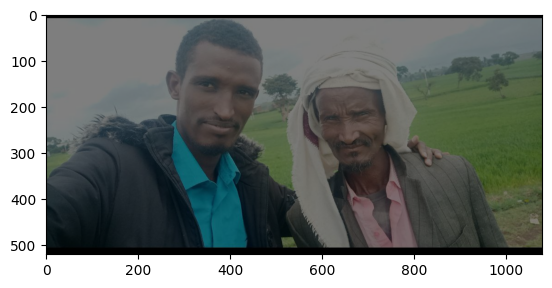

In [63]:
contrast_im = bright_contrast_loop(im,alpha=0.5)
plt.imshow(contrast_im)

### Changing brightness and contrast using library function

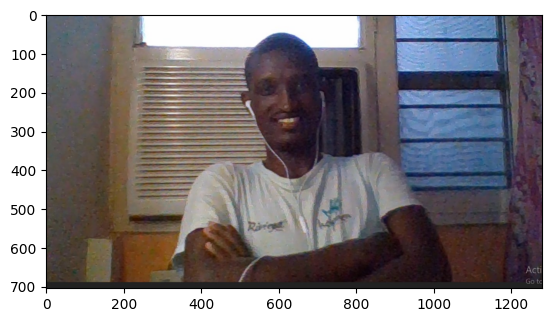

In [64]:
im = read_image('/content/photo_6142949710831399206_y.jpg')
plt.imshow(im)

In [65]:
def bright_contrast (image, alpha=1, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

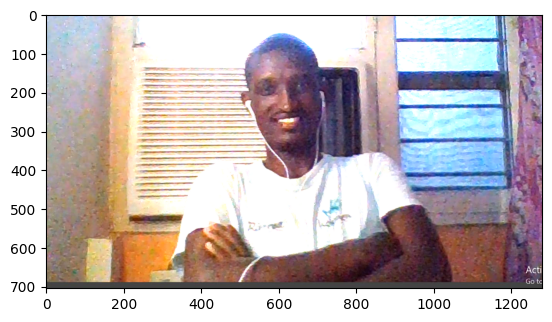

In [66]:
contrast_im = bright_contrast(im, alpha=2)
plt.imshow(contrast_im)

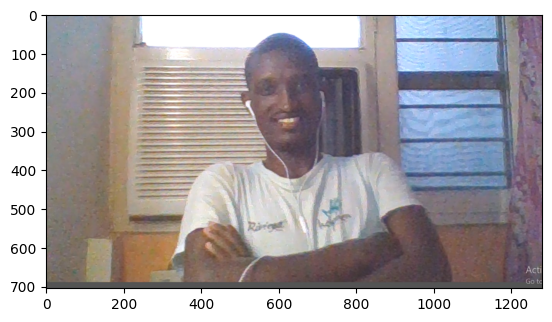

In [67]:
brighter_im = bright_contrast(im, beta=50)
plt.imshow(brighter_im)

## 7. Bounding Box

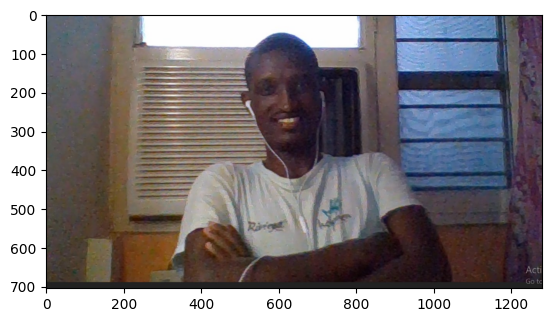

In [68]:
im = read_image('/content/photo_6142949710831399206_y.jpg')
plt.imshow(im)

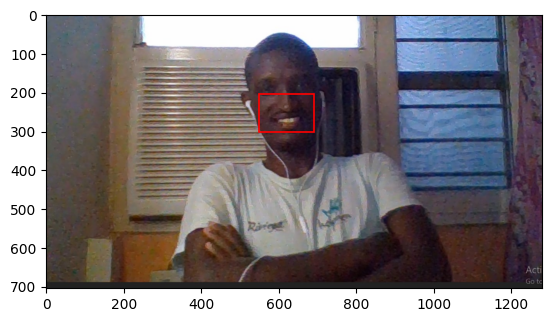

In [71]:
xmin = 550
ymin= 202
xmax = 690
ymax = 300

fig,ax = plt.subplots(1)
ax.imshow(im)
#make rectangular bounding box
bb = patches.Rectangle(xy=(xmin,ymin),width=xmax-xmin,height=ymax-ymin,linewidth=1.2,edgecolor='r',facecolor='none')
ax.add_patch(bb) #add bounding box to image
plt.show()

## 8. Showing multiple images in a grid

In [ ]:
image_paths = list(Path('./dogs').iterdir())
images = [read_image(p) for p in image_paths]

In [ ]:
fig = plt.figure(figsize=(20, 20))
columns = 4
rows = 4

pics = []
for i in range(columns*rows):
    pics.append(fig.add_subplot(rows, columns, i+1,title=image_paths[i].parts[-1].split('.')[0]))
    plt.imshow(images[i])

plt.show()

## 9. Convert to black and white

In [ ]:
from skimage import color
from skimage import io

img = color.rgb2gray(io.imread(str(image_paths[0])))
plt.imshow(img,cmap = plt.cm.gray)

## 10. Blur

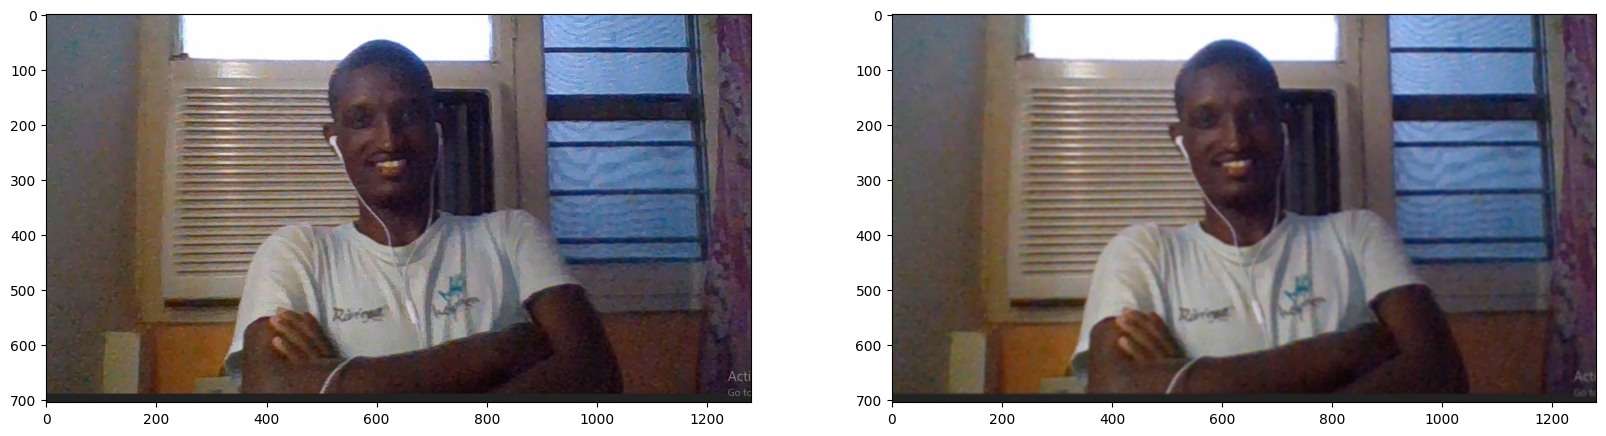

In [78]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

im = read_image('/content/photo_6142949710831399206_y.jpg')
blur = cv2.blur(im,(5,5))
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(im)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(blur)